In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

In [3]:
df = pd.read_csv('Ajoneuvojen_avoin_data_5_21.csv', encoding='ISO-8859-1', on_bad_lines="skip", delimiter=";",low_memory=False)

Otetaan dataa 2010 luvulta eteenpäin

In [4]:
df['ensirekisterointipvm'] = pd.to_datetime(df['ensirekisterointipvm'])
df = df[df['ensirekisterointipvm'] > '2010-01-01']

Otetaan pelkästään M1 ajoneuvoluokan arvot eli henkilöautot

In [5]:
df = df[df['ajoneuvoluokka'] == 'M1']

In [6]:
df

,ajoneuvoluokka,ensirekisterointipvm,ajoneuvoryhma,ajoneuvonkaytto,variantti,versio,kayttoonottopvm,vari,ovienLukumaara,korityyppi,ohjaamotyyppi,istumapaikkojenLkm,omamassa,teknSuurSallKokmassa,tieliikSuurSallKokmassa,ajonKokPituus,ajonLeveys,ajonKorkeus,kayttovoima,iskutilavuus,suurinNettoteho,sylintereidenLkm,ahdin,sahkohybridi,sahkohybridinluokka,merkkiSelvakielinen,mallimerkinta,vaihteisto,vaihteidenLkm,kaupallinenNimi,voimanvalJaTehostamistapa,tyyppihyvaksyntanro,yksittaisKayttovoima,kunta,NEDC_Co2,NEDC2_Co2,WLTP_Co2,WLTP2_Co2,matkamittarilukema,valmistenumero2,jarnro
5392,M1,2011-08-05,NaN,1.0,N026F0,SDAAA50,20020228,0,4.0,NaN,1.0,5.0,1905.0,2430.0,2430.0,5038.0,1855.0,1444.0,02,3222.0,145.0,6.0,True,False,NaN,Mercedes-Benz,4D S 320 CDI SEDAN AUTOMATIC-220026/296,2,NaN,S 320 CDI,5.0,e1*97/27*0099*08,02,50.0,212.0,NaN,NaN,NaN,393308.0,WDB2200261,5393
24902,M1,2010-01-07,NaN,1.0,ZNR20(R),ZNR11L-GRMEKW(1F),20100107,Y,NaN,AF,NaN,7.0,1455.0,2035.0,2035.0,4370.0,1770.0,1620.0,01,1790.0,95.0,4.0,NaN,NaN,NaN,Toyota,5D COROLLA VERSO MPV 1.8-ZNR11L-GRMEKW/275,NaN,NaN,COROLLA VERSO,5.0,e11*2001/116*0222*05,01,49.0,184.0,NaN,NaN,NaN,309165.0,NMTER16R80,24903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360976,M1,2023-06-30,NaN,1.0,R84ST1,CZAA050A,20220516,8,5.0,AB,NaN,5.0,2040.0,2610.0,2610.0,4729.0,1890.0,1571.0,01,1991.0,155.0,4.0,True,True,1.0,Mercedes-Benz,GLC 300 e 4MATIC Viistoperä (AB) 5ov 1991cm3 A,2,9.0,GLC 300 e 4MATIC,5.0,e1*2001/116*0480*43,01,500.0,NaN,NaN,NaN,55.0,36474.0,W1N2533531,5360977
5360979,M1,2023-06-30,NaN,1.0,F5E11,E11B11,20200303,8,5.0,AF,NaN,5.0,1760.0,2170.0,2170.0,4180.0,1800.0,1570.0,04,NaN,NaN,NaN,False,False,NaN,Hyundai,Kona Monikäyttöajoneuvo (AF) 5ov,X,1.0,Kona,5.0,e4*2007/46*1259*06,04,433.0,NaN,NaN,NaN,NaN,67647.0,KMHK381GFL,5360980


In [7]:
value_counts_series = df['merkkiSelvakielinen'].dropna().value_counts()
values_to_keep = value_counts_series[value_counts_series > 30000].index
df = df[df['merkkiSelvakielinen'].isin(values_to_keep)]

In [8]:
df['merkkiSelvakielinen'].dropna().nunique()

15

In [9]:
df['merkkiSelvakielinen'].dropna().value_counts()

merkkiSelvakielinen
Toyota           197002
Mercedes-Benz    142560
                  ...  
Peugeot           37177
Renault           30317
Name: count, Length: 15, dtype: int64

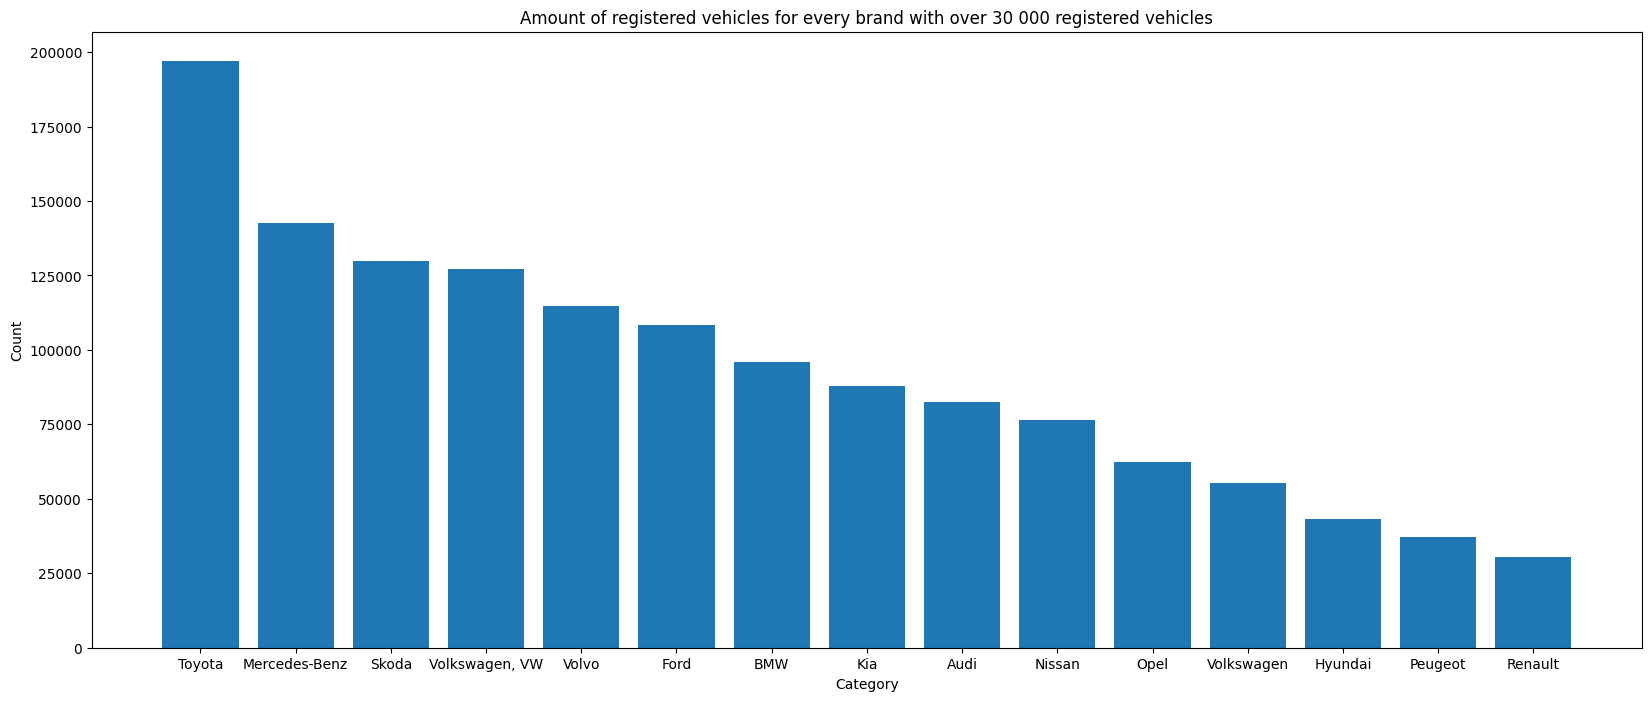

In [10]:
plt.figure(figsize=(20, 8))
value_counts = df['merkkiSelvakielinen'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Amount of registered vehicles for every brand with over 30 000 registered vehicles')
plt.show()

C:\Users\Tooslickki\AppData\Local\Temp\ipykernel_11120\3268623430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_df['Year'] = (brand_df['ensirekisterointipvm']).dt.year


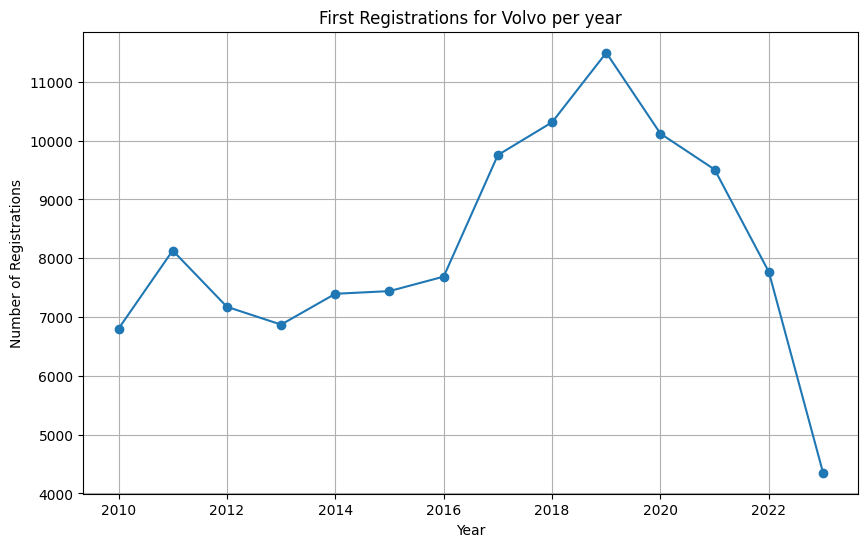

In [11]:

brand_df = df[df['merkkiSelvakielinen'] == 'Volvo']
brand_df['Year'] = (brand_df['ensirekisterointipvm']).dt.year
brand_counts = brand_df.groupby('Year').size()
# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(brand_counts.index, brand_counts.values, marker='o', linestyle='-')
plt.title('First Registrations for Volvo per year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.show()